### 🕵🏻‍♂️ Hidden Markov Models for Quant Finance

##### ▶️ Related Quant Guild Videos:

- [Expected Stock Returns Don't Exist](https://youtu.be/iXNSBn5xqrA)

- [What Does AI Actually Learn](https://youtu.be/tX7b2KT63WQ)

- [Why Portfolio Optimization Doesn't Work](https://youtu.be/eZIITtd3UfY)

- [How to Trade Option Implied Volatility](https://youtu.be/kQPCTXxdptQ)

- [Time Series Analysis for Quant Finance](https://youtu.be/JwqjuUnR8OY)

- [Quant Trader on Retail vs Institutional Trading](https://youtu.be/j1XAcdEHzbU)

- [Quant on Trading and Investing](https://youtu.be/CKXp_sMwPuY)

- [Markov Chains for Quant Finance](https://youtu.be/k8oQfd6M5sA)

###### ______________________________________________________________________________________________________________________________________

##### [🚀 Master your Quantitative Skills with Quant Guild](https://quantguild.com)

##### [📚 Visit the Quant Guild Library for more Jupyter Notebooks](https://github.com/romanmichaelpaolucci/Quant-Guild-Library)

##### [📈 Interactive Brokers for Algorithmic Trading](https://www.interactivebrokers.com/mkt/?src=quantguildY&url=%2Fen%2Fwhyib%2Foverview.php)

##### [👾 Quant Guild Discord](discord.com/invite/MJ4FU2c6c3)

---

In [1]:
%%html
<style>
/* Overwrite the hard-coded white background for ipywidgets */
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
/* Set widget foreground text and color to match the VS Code dark theme */
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}
</style>

### 📖 Sections


#### 1.) 🎲 Latent Random Variables

- Random Variables

- Latent Random Variables

- Example: Realized Volatility

#### 2.) ⛓️ Markov Chains

- State-Transition Models

- Example: Low/Med/High Volatility Regime

#### 3.) 👥 Hidden Markov Models

- Hidden Markov Models

- Forward/Backward Algorithms

- Training Hidden Markov Models (Baum-Welch Algorithm)

- Example: 3-State Hidden Markov Model

#### 4.) 💭 Closing Thoughts and Future Topics

---

#### 1.) 🎲 Latent Random Variables

##### Random Variables

When the outcome of an event is uncertain we tend to model it as a random variable

This is not a comment on weather the event is *actually* random, but rather tries to say something about the likelihood of possible outcomes or different states of the world

We can never *observer* this *true* *population* or *empirical* data generating distribution, but effectively it is what we are trying to model

Mathematically, random variables can be fully defined by things like

- Probability mass or density functions
- Cumulative distribution functions
- Characteristic functions
- . . .

which all must satisfy varying properties and so on and so forth to ensure they are in fact modeling randomness in an appropriate probablistic way

**Example:**
$$\text{Stock Returns} = S \sim N(0, 1)$$

**All of the Following are Equivalent Mathematically to Define the Random Variable Above:**
 $$\text{PDF: } f_S(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} \iff  \text{CDF: } F_S(x) = \int_{-\infty}^x \frac{1}{\sqrt{2\pi}} e^{-\frac{(t-\mu)^2}{2\sigma^2}} dt \iff  \text{Char. Function: } \phi_S(t) = e^{i\mu t - \frac{\sigma^2t^2}{2}}$$

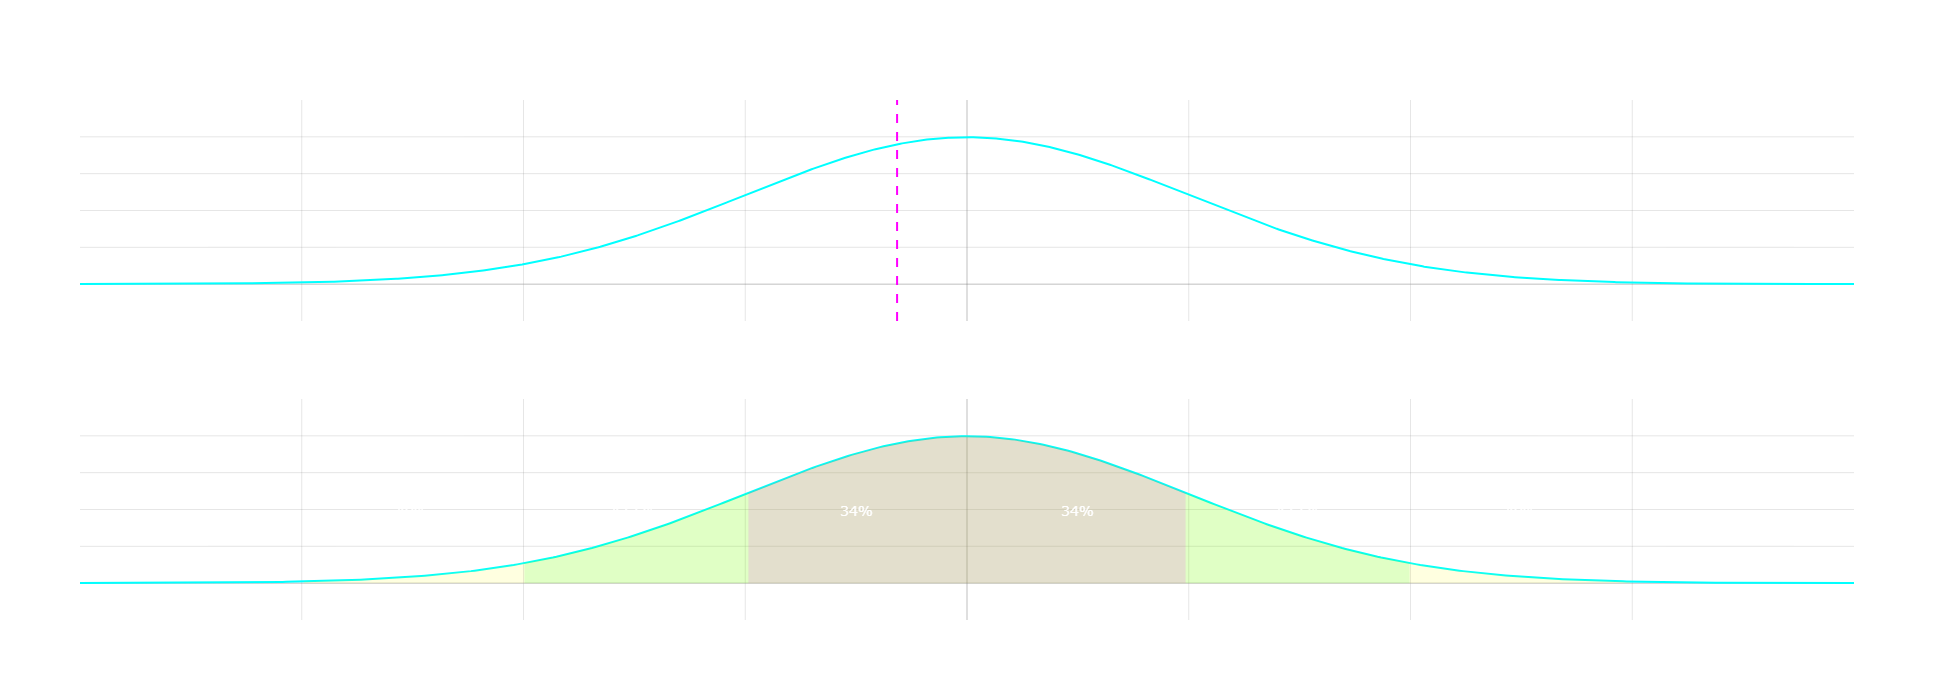

In [2]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Generate points for normal distribution curve
x = np.linspace(-4, 4, 1000)
y = 1/np.sqrt(2*np.pi) * np.exp(-x**2/2)

# Draw a random sample from standard normal
random_draw = np.random.normal(0, 1)

# Create figure with secondary y-axis
fig = make_subplots(rows=2, cols=1, vertical_spacing=0.15, subplot_titles=("Stock Returns as a Normal Random Variable", "Empirical Rule of the Normal Distribution"))

# Add normal distribution curve to first subplot
fig.add_trace(
    go.Scatter(
        x=x,
        y=y,
        mode='lines',
        line=dict(color='rgba(0, 255, 255, 1)', width=2),
        name='Standard Normal PDF',
        showlegend=False
    ),
    row=1, col=1
)

# Add vertical line at random draw to first subplot
fig.add_trace(
    go.Scatter(
        x=[random_draw, random_draw],
        y=[-0.1, 0.5],
        mode='lines',
        line=dict(
            color='rgba(255, 0, 255, 1)', 
            width=2,
            dash='dash'
        ),
        name=f'Random Draw: {random_draw:.3f}',
        showlegend=False
    ),
    row=1, col=1
)

# Add empirical rule plot
mu = 0
sigma = 1
x_emp = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 500)
y_emp = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_emp - mu) / sigma) ** 2)

# Add main curve to second subplot
fig.add_trace(
    go.Scatter(
        x=x_emp,
        y=y_emp,
        mode='lines',
        line=dict(color='rgba(0, 255, 255, 1)', width=2),
        name='Normal Distribution',
        showlegend=False
    ),
    row=2, col=1
)

# Define ranges for empirical rule with neon colors
ranges = [
    (mu - 1 * sigma, mu + 1 * sigma, '34%', 'rgba(255, 0, 255, 0.3)'),
    (mu - 2 * sigma, mu + 2 * sigma, '47.5%', 'rgba(0, 255, 0, 0.3)'),
    (mu - 3 * sigma, mu + 3 * sigma, '49%', 'rgba(255, 255, 0, 0.3)')
]

# Add shaded regions for empirical rule
for start, end, label, color in reversed(ranges):
    mask = (x_emp >= start) & (x_emp <= end)
    x_fill = x_emp[mask]
    y_fill = y_emp[mask]
    
    fig.add_trace(
        go.Scatter(
            x=np.concatenate([x_fill, x_fill[::-1]]),
            y=np.concatenate([y_fill, np.zeros_like(y_fill)]),
            fill='toself',
            fillcolor=color,
            opacity=0.4,
            line=dict(width=0),
            name=f'{label} Rule',
            showlegend=False
        ),
        row=2, col=1
    )
    
    # Add percentage text annotations at the edges of each range
    fig.add_annotation(
        x=start + 0.5,  # Moved right by 0.5
        y=0.2,
        text=label,
        showarrow=False,
        font=dict(size=14, color='white'),
        row=2,
        col=1
    )
    fig.add_annotation(
        x=end - 0.5,  # Moved left by 0.5
        y=0.2, 
        text=label,
        showarrow=False,
        font=dict(size=14, color='white'),
        row=2,
        col=1
    )

# Update layout
fig.update_layout(
    height=700,
    width=1100,
    showlegend=False,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white')
)

# Update axes for both subplots
for i in [1, 2]:
    fig.update_xaxes(
        title='X',
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        row=i, col=1
    )
    fig.update_yaxes(
        title='Probability Density',
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        range=[-0.1, 0.5],
        row=i, col=1
    )

fig.show()


**Remark:** *NOBODY*, no person, no institution can *predict* anything - all they can do is come up with a *best guess* based on different possible states of the world

###### ______________________________________________________________________________________________________________________________________

##### So what's the big problem with modeling uncertainty as random variables?

**Remark:** When we model uncertainty as random variables in any capacity (independent random variables, markov chains, hidden markov models, stochastic processes) we 

are making assumptions that are *certainly* wrong, this can lead to **misinformed** decision making which is exactly the opposite of what we are trying to do.

In [3]:
# Read in NVDA returns data
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('NVDA_returns.csv')

# Calculate daily returns
df['Returns'] = df['Close'].pct_change()

# Remove the first row which will have NaN return
df = df.dropna()

# Get sample mean and std as MLE estimates
mu_hat = df['Returns'].mean()
sigma_hat = df['Returns'].std()

# Generate points for fitted normal distribution
x_fit = np.linspace(mu_hat - 4*sigma_hat, mu_hat + 4*sigma_hat, 1000)
y_fit = 1/(sigma_hat * np.sqrt(2*np.pi)) * np.exp(-(x_fit - mu_hat)**2/(2*sigma_hat**2))

# Create figure with secondary y-axis
fig = make_subplots(rows=2, cols=1, vertical_spacing=0.15, 
                    subplot_titles=("NVDA Returns with Fitted Normal Distribution", 
                                  "Empirical Rule of the Normal Distribution"))

# Add histogram of returns
fig.add_trace(
    go.Histogram(
        x=df['Returns'],
        name='NVDA Returns',
        nbinsx=50,
        histnorm='probability density',
        marker_color='rgba(0, 255, 255, 0.5)'
    ),
    row=1, col=1
)

# Add fitted normal distribution curve
fig.add_trace(
    go.Scatter(
        x=x_fit,
        y=y_fit,
        mode='lines',
        line=dict(color='rgba(255, 0, 255, 1)', width=2),
        name='Fitted Normal'
    ),
    row=1, col=1
)

# Add vertical lines for standard deviations in first subplot
for n in [-4, -3, -2, -1, 1, 2, 3, 4]:
    fig.add_shape(
        type="line",
        x0=mu_hat + n*sigma_hat,
        x1=mu_hat + n*sigma_hat,
        y0=0,
        y1=30,
        line=dict(color='rgba(128,128,128,0.5)', width=1, dash='dash'),
        row=1, col=1
    )

# Add empirical rule plot
mu = 0
sigma = 1
x_emp = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 500)
y_emp = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_emp - mu) / sigma) ** 2)

# Add main curve to second subplot
fig.add_trace(
    go.Scatter(
        x=x_emp,
        y=y_emp,
        mode='lines',
        line=dict(color='rgba(0, 255, 255, 1)', width=2),
        name='Normal Distribution',
        showlegend=False
    ),
    row=2, col=1
)

# Define ranges for empirical rule with neon colors
ranges = [
    (mu - 1 * sigma, mu + 1 * sigma, '34%', 'rgba(255, 0, 255, 0.3)'),
    (mu - 2 * sigma, mu + 2 * sigma, '47.5%', 'rgba(0, 255, 0, 0.3)'),
    (mu - 3 * sigma, mu + 3 * sigma, '49%', 'rgba(255, 255, 0, 0.3)')
]

# Add shaded regions for empirical rule
for start, end, label, color in reversed(ranges):
    mask = (x_emp >= start) & (x_emp <= end)
    x_fill = x_emp[mask]
    y_fill = y_emp[mask]
    
    fig.add_trace(
        go.Scatter(
            x=np.concatenate([x_fill, x_fill[::-1]]),
            y=np.concatenate([y_fill, np.zeros_like(y_fill)]),
            fill='toself',
            fillcolor=color,
            opacity=0.4,
            line=dict(width=0),
            name=f'{label} Rule',
            showlegend=False
        ),
        row=2, col=1
    )
    
    # Add percentage text annotations
    fig.add_annotation(
        x=start + 0.5,
        y=0.2,
        text=label,
        showarrow=False,
        font=dict(size=14, color='white'),
        row=2,
        col=1
    )
    fig.add_annotation(
        x=end - 0.5,
        y=0.2,
        text=label,
        showarrow=False,
        font=dict(size=14, color='white'),
        row=2,
        col=1
    )
    
    # Add vertical lines for standard deviations
    fig.add_shape(
        type="line",
        x0=start, x1=start,
        y0=-0.1, y1=1.0,
        line=dict(color='rgba(128,128,128,0.5)', width=1, dash='dash'),
        row=2, col=1
    )
    fig.add_shape(
        type="line",
        x0=end, x1=end,
        y0=-0.1, y1=1.0,
        line=dict(color='rgba(128,128,128,0.5)', width=1, dash='dash'),
        row=2, col=1
    )

# Update layout
fig.update_layout(
    height=800,
    width=1100,
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white')
)

# Update axes for both subplots
fig.update_xaxes(
    title='Returns',
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)',
    row=1, col=1
)
fig.update_yaxes(
    title='Density',
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)',
    row=1, col=1
)

# Update second subplot axes
fig.update_xaxes(
    title='X',
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)',
    row=2, col=1
)
fig.update_yaxes(
    title='Probability Density',
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)',
    range=[-0.1, 0.5],
    row=2, col=1
)

fig.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_21196\3849147703.py:9: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



###### ______________________________________________________________________________________________________________________________________

##### Quantifying the Modeling Problem in Plain English

In [4]:
from scipy.stats import norm

# Calculate probability of observing something > 4 standard deviations
prob_4_sigma = 1 - norm.cdf(4)
print(f"Probability of observing something > 4σ in a normal distribution: {prob_4_sigma:.10f}")
print(f"Or approximately 1 in {int(1/prob_4_sigma):,} observations")

# Calculate in terms of years assuming daily observations (252 trading days per year)
years = (1/prob_4_sigma) / 252
print(f"With daily observations, this would occur on average once every {years:.1f} years")



Probability of observing something > 4σ in a normal distribution: 0.0000316712
Or approximately 1 in 31,574 observations
With daily observations, this would occur on average once every 125.3 years


Clearly, the model is not capturing the necessary dynamics.  To observe the return distribution we have for NVDA (assuming normality) we would have needed to observe over 1,000 years of daily return data on average to see these extremes.  Specifically, the normal distribution fails to capture excess kurtosis in the empirical return distribution which dramatically increases the likelihood of extreme events (by apparently several hundreds of years!)

Moreover, some assumptions and subsequent violations are more insulting than others.  

In other words, some assumptions are not as strong but are just as useful and when violated don't have as strong of an impact in our decisions made based on the model we develop.

- A *no arbitrage* assumption, for example, is far from overly strong and has minimal impact in terms of decisions made if it is indeed violated in practice (it is violated)

In [5]:
import numpy as np
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Generate sample data
np.random.seed(42)
n_samples = 30000  # Increased base number of samples

# Create time-varying normal distributions with varying variance
n_frames = 60
means = np.concatenate([
    np.linspace(0, 2, n_frames//3),
    np.linspace(2, -2, n_frames//3),
    np.linspace(-2, 0, n_frames//3)
])

# Variance increases with distance from mean=0
variances = 0.5 + (np.abs(means) * 0.5)**2

x_range = np.linspace(-6, 6, 300)  # Increased x range
frames = []
all_samples = []

for mean, var in zip(means, variances):
    # Draw significantly more samples when closer to mean=0
    scaling_factor = 1 / (1 + np.abs(mean)**2)  # Quadratic scaling for more dramatic effect
    n_samples_current = int(n_samples * scaling_factor)
    X = np.random.normal(mean, np.sqrt(var), n_samples_current)
    kde_X = stats.gaussian_kde(X)
    
    # Generate samples from current distribution
    samples = np.random.normal(mean, np.sqrt(var), n_samples_current//500)  # Increased sample retention
    all_samples.extend(samples)
    
    frames.append(
        go.Frame(
            data=[
                go.Scatter(
                    x=x_range,
                    y=kde_X(x_range),
                    mode='lines',
                    line=dict(color='rgba(255, 0, 255, 1)', width=2),
                    name='Varying Normal'
                ),
                go.Histogram(
                    x=all_samples,
                    nbinsx=50,  # Increased number of bins
                    name='Sample Distribution',
                    marker_color='rgba(0, 255, 255, 0.6)'
                )
            ]
        )
    )

# Create base figure with subplots
fig = make_subplots(rows=2, cols=1, row_heights=[0.6, 0.4], subplot_titles=('Unobservable Data Generating Distribution', 'Observed (Empirical) Stock Returns'))

# Add initial traces
fig.add_trace(frames[0].data[0], row=1, col=1)
fig.add_trace(frames[0].data[1], row=2, col=1)

# Add frames
fig.frames = frames

# Add animation buttons with increased repetitions
fig.update_layout(
    updatemenus=[{
        'type': 'buttons',
        'showactive': False,
        'buttons': [{
            'label': 'Play',
            'method': 'animate',
            'args': [None, {
                'frame': {'duration': 50, 'redraw': True},
                'fromcurrent': True,
                'transition': {'duration': 0},
                'mode': 'immediate',
                'loop': True  # Enable looping
            }]
        }]
    }]
)

# Update layout
fig.update_layout(
    height=700,
    width=1000,
    showlegend=False,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white'),
    title='Normal Distribution with Varying Mean and Variance'
)

# Update axes for both subplots with expanded range
fig.update_xaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)',
    range=[-6, 6],  # Increased range
    row=1, col=1
)
fig.update_yaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)',
    row=1, col=1
)

fig.update_xaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)',
    range=[-6, 6],  # Increased range
    row=2, col=1
)
fig.update_yaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)',
    range=[0, 200],  # Increased range to accommodate more samples
    row=2, col=1
)

fig.show()


##### This Better Resembles What we Observe in Reality and Explains Why Modeling is NOT a Trivial Problem

**Here are a few considerations when modeling uncertainty in quant finance**

- 🎯 Parameters are *NOT* fixed in parametric models
    - for example, if we model expected returns as a normal distribution the mean return changes over time, how do we estimate the mean?

- 🕒 Distributions themselves are *NOT* fixed and change over time
    - it may be better modelled as a normal distribution at one time, a lognormal another time - we only know this *AFTER* the fact if we do a distribution fitting exercise

- 📈 Fixed random variables or distributions often don't capture real market dynamics and can lead to severely under or overestimating the likelihood of different outcomes
    - Excess kurtosis, volatility clustering, leverage effect just to name a few in the context of returns and volatility which we will further discuss herein

but this does not preclude us from making informed decisions based on the values observed in these models assuming 

they are constructed effectively.  All models are wrong, model informed decision making enables the accumulation of positive expected value over time or, in other 

words, optimal decision making in the face of uncertainty

###### ______________________________________________________________________________________________________________________________________

##### Latent Random Variables

Values like *returns* are **observable** and we typically estimate statistical quantities on observed values like the *mean, average,* or *expectation*

The efficacy of these values is constantly in question from the animation we observed above

So if observable random variables are difficult to model - what is an unobservable random variable and how can we ever hope to model it?

In [6]:
# Generate an Ornstein-Uhlenbeck process for the variance path
def ou_process(theta=2.0, mu=1.0, sigma=2.0, dt=0.1, n_steps=n_frames):  # Increased sigma from 0.5 to 2.0
    x = np.zeros(n_steps)
    x[0] = mu
    for t in range(1, n_steps):
        dx = theta * (mu - x[t-1]) * dt + sigma * np.sqrt(dt) * np.random.normal()
        x[t] = x[t-1] + dx
    return np.maximum(x, 0.1)  # Ensure variance stays positive

# Generate variance path and means
time_points = np.linspace(0, n_frames/10, n_frames)
variance_path = ou_process()
means = np.concatenate([
    np.linspace(0, 2, n_frames//3),
    np.linspace(2, -2, n_frames//3),
    np.linspace(-2, 0, n_frames//3)
])

# Create base figure with three subplots
fig = make_subplots(
    rows=3, 
    cols=1, 
    row_heights=[0.2, 0.4, 0.4], 
    subplot_titles=(
        'Latent Variance Process',
        'Unobservable Data Generating Distribution', 
        'Observed (Empirical) Stock Returns'
    )
)

frames = []
all_samples = []

for i in range(n_frames):
    # Draw samples using current mean and OU variance
    n_samples_current = int(n_samples * (1 / (1 + np.abs(means[i])**2)))
    X = np.random.normal(means[i], np.sqrt(variance_path[i]), n_samples_current)
    kde_X = stats.gaussian_kde(X)
    
    # Generate samples
    samples = np.random.normal(means[i], np.sqrt(variance_path[i]), n_samples_current//500)
    all_samples.extend(samples)
    
    frames.append(
        go.Frame(
            data=[
                # Variance path
                go.Scatter(
                    x=time_points[:i+1],
                    y=variance_path[:i+1],
                    mode='lines',
                    line=dict(color='rgba(0, 255, 255, 1)', width=2),
                    name='Variance Path'
                ),
                # Distribution
                go.Scatter(
                    x=x_range,
                    y=kde_X(x_range),
                    mode='lines',
                    line=dict(color='rgba(255, 0, 255, 1)', width=2),
                    name='Varying Normal'
                ),
                # Histogram
                go.Histogram(
                    x=all_samples,
                    nbinsx=50,
                    name='Sample Distribution',
                    marker_color='rgba(0, 255, 255, 0.6)'
                )
            ]
        )
    )

# Add initial traces
fig.add_trace(frames[0].data[0], row=1, col=1)
fig.add_trace(frames[0].data[1], row=2, col=1)
fig.add_trace(frames[0].data[2], row=3, col=1)

# Add frames
fig.frames = frames

# Add animation buttons
fig.update_layout(
    updatemenus=[{
        'type': 'buttons',
        'showactive': False,
        'buttons': [{
            'label': 'Play',
            'method': 'animate',
            'args': [None, {
                'frame': {'duration': 50, 'redraw': True},
                'fromcurrent': True,
                'transition': {'duration': 0},
                'mode': 'immediate',
                'loop': True
            }]
        }]
    }]
)

# Update layout
fig.update_layout(
    height=700,
    width=1000,
    showlegend=False,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white'),
    title='Normal Distribution with Varying Mean and OU-Process Variance'
)

# Update axes for all subplots
for row in [1, 2, 3]:
    fig.update_xaxes(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        row=row, 
        col=1
    )
    fig.update_yaxes(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        row=row, 
        col=1
    )

# Specific range updates
fig.update_xaxes(range=[0, n_frames/10], row=1, col=1)  # Time range for variance path
fig.update_yaxes(range=[0, 5], row=1, col=1)  # Increased variance range from 3 to 5
fig.update_xaxes(range=[-6, 6], row=2, col=1)  # Distribution x-range
fig.update_yaxes(range=[0, 1], row=2, col=1)  # Added y-range for distribution plot
fig.update_xaxes(range=[-6, 6], row=3, col=1)  # Histogram x-range
fig.update_yaxes(range=[0, 300], row=3, col=1)  # Histogram y-range

fig.show()


##### This Animation Elucidates a Critical Concept in Modeling Uncertain Events

- We can't observe the data generating distribution

- The data generating distribution can change over time by *latent* variables or explainers that are oftentimes *unobservable* 
    - latent explainers have to be proxied by other models themselves
    - we then have to assess the efficacy of those models, so on and so forth

###### ______________________________________________________________________________________________________________________________________

##### Example: Realized Volatility

A real world example of a latent process that influences the varying likelihoods of different outcomes of the data of interest

In [7]:
# Read in NVDA data and calculate returns
df = pd.read_csv('NVDA_returns.csv')
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
df = df.sort_values('Date')  # Sort chronologically
df['Returns'] = df['Close'].pct_change(fill_method=None)
df = df.dropna()

# Filter for 2024-2025 only
df = df[(df['Date'].dt.year >= 2024) & (df['Date'].dt.year <= 2025)]

# Calculate realized volatility using two different windows
df['RV_20'] = df['Returns'].rolling(window=20).std() * np.sqrt(252)  # 20-day rolling vol
df['RV_60'] = df['Returns'].rolling(window=60).std() * np.sqrt(252)  # 60-day rolling vol

# Drop initial NaN values from warmup period
df = df.dropna()

# Create figure
fig = go.Figure()

# Add 20-day volatility
fig.add_trace(
    go.Scatter(
        x=df['Date'],
        y=df['RV_20'],
        name='20-Day Rolling Volatility',
        line=dict(color='rgba(0, 255, 0, 1)', width=2)  # Neon green
    )
)

# Add 60-day volatility
fig.add_trace(
    go.Scatter(
        x=df['Date'],
        y=df['RV_60'],
        name='60-Day Rolling Volatility',
        line=dict(color='rgba(255, 0, 255, 1)', width=2)  # Neon pink
    )
)

# Update layout
fig.update_layout(
    title='NVDA Realized Volatility: 20-Day vs 60-Day Rolling Windows',
    xaxis_title='Date',
    yaxis_title='Annualized Volatility',
    height=500,
    width=1000,
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white')
)

# Update axes
fig.update_xaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)',
    dtick='M3'  # Show ticks every quarter
)

fig.update_yaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)'
)

fig.show()


##### We Want to Inform Our Model for the Data Generating Distribution Based on this Latent Process

**Reasonable Considerations:**
- 🌊 What period should we use to inform our model
    - 20-Day Rolling Volatility? 60-Day Rolling Volatility?  A Fixed Mean Level?
- 🎯 Are we approximating this latent variable in a reasonable way?
    - are there better or worse ways in different regimes, for example, to model it? (Implied vs. Realized) so on and so forth
- 📊 How do we assess the efficacy of our latent variable in governing our model?
    - is there evidence the latent variable we select *actually* influences the data generating distribution and likelihood of different outcomes?

---

#### 2.) ⛓️ Markov Chains

##### State-Transition Models

Suppose we hypothesize that volatility does in fact impact the parameterization of our model (certainly a reasonable idea)

We can model the latent process above and *bucket* volatility into different regimes

##### <u>Motivating Latent State Transition Models</u>

In [8]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde

# Read the data
df = pd.read_csv('NVDA_returns.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date', ascending=True)  # Sort by date ascending before calculating returns
df['Returns'] = df['Close'].pct_change()
df = df.dropna()

# Create two time periods
period1 = df[(df['Date'] >= '2025-01-01') & (df['Date'] <= '2025-04-08')]
period2 = df[(df['Date'] >= '2024-09-01') & (df['Date'] <= '2024-12-31')]

# Calculate means
mean1 = period1['Returns'].mean()
mean2 = period2['Returns'].mean()

# Fit KDE for both periods
kde1 = gaussian_kde(period1['Returns'])
kde2 = gaussian_kde(period2['Returns'])

# Generate points for KDE plots
x1 = np.linspace(period1['Returns'].min(), period1['Returns'].max(), 1000)
y1 = kde1(x1)

x2 = np.linspace(period2['Returns'].min(), period2['Returns'].max(), 1000)
y2 = kde2(x2)

# Create subplots
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=("Jan-May 2025 Returns Distribution (High Volatility)", 
                                  "Sept-Dec 2024 Returns Distribution (Low Volatility)"))

# First subplot
fig.add_trace(
    go.Scatter(
        x=x1,
        y=y1,
        mode='lines',
        line=dict(color='rgba(255, 0, 255, 1)', width=2),
        name='KDE 2025'
    ),
    row=1, col=1
)

# Add mean line for first subplot
fig.add_shape(
    type="line",
    x0=mean1,
    x1=mean1,
    y0=0,
    y1=max(y1)*1.2,  # Extend beyond the plot
    line=dict(
        color='red' if mean1 < 0 else 'green',
        width=2,
        dash='dash'
    ),
    row=1, col=1
)

# Second subplot
fig.add_trace(
    go.Scatter(
        x=x2,
        y=y2,
        mode='lines',
        line=dict(color='rgba(255, 0, 255, 1)', width=2),
        name='KDE 2024'
    ),
    row=1, col=2
)

# Add mean line for second subplot
fig.add_shape(
    type="line",
    x0=mean2,
    x1=mean2,
    y0=0,
    y1=max(y2)*1.2,  # Extend beyond the plot
    line=dict(
        color='red' if mean2 < 0 else 'green',
        width=2,
        dash='dash'
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    height=500,
    width=1100,
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white')
)

# Update axes
for i in [1, 2]:
    fig.update_xaxes(
        title='Returns',
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        row=1, col=i
    )
    fig.update_yaxes(
        title='Density',
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        row=1, col=i
    )

fig.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_21196\3773758272.py:11: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



**Reasonable Questions**
- 📈 What is the most effective way to model the state transition space?
    - too many states and we may overfit, too few and we won't capture the necessary dynamics
- 🎯 What quantity of latent spaces account for the most significant variation in the quantity of interest?
    - unsatisfyingly, this likely varies over time with new factors dropping in and out
- 📊 What models are sufficient for modeling state-transitions over a series of steps (time)?
    - local conditional dependence and an expanded state space certainly captures many dynmics, but there is evidence of long-range dependencies violating this

###### ______________________________________________________________________________________________________________________________________

##### Example: Low/Med/High Volatility Regimes

# ![Markov Chains 1](mc.png)

This is a state-transition diagram that we can populate with estimated probabilities from data.  How?  See my video: https://youtu.be/k8oQfd6M5sA 

We can estimate the values for these states based on historic data

- *Low*: 33% of Historic Volatility
- *Med*: 33%-66% of Historic Volatility
- *High*: 66%+ of Historic Volatility

**Remark:** Past performance isn't indicative of future performance - why are we using historic values to inform this model?  Well, of all things it is reasonable 

**in my opinion** to use historic data for volatility since the process itself is mean reverting and the level may vary over time but to proxy it we can 

effectively even with error (non-stationarity, so on and so forth)

###### ______________________________________________________________________________________________________________________________________

##### What Does this Look Like?

Remember, we are trying to model returns conditional on a volatility state (purple return chart above) that we are saying satisfies local conditional dependence

Check out the following chart that is effectively doing this by segmenting by volatility regime - this chart was way to hard to make I hope you enjoy it lol

In [9]:
import numpy as np
import plotly.graph_objects as go

df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values('Date', ascending=True)

# Filter data for 2024-2025
df = df[(df['Date'] >= '2024-01-01') & (df['Date'] <= '2025-12-31')]


# --- Calculate rolling volatility ---
window = 20  # 20-day rolling window
df['Volatility'] = df['Returns'].rolling(window=window).std() * np.sqrt(252)  # Annualized

# Volatility thresholds
vol_33 = df['Volatility'].quantile(0.33)
vol_66 = df['Volatility'].quantile(0.66)

# Volatility regimes
df['Regime'] = 'Medium'
df.loc[df['Volatility'] <= vol_33, 'Regime'] = 'Low'
df.loc[df['Volatility'] >= vol_66, 'Regime'] = 'High'

# --- Create figure ---
fig = go.Figure()

# Regime colors
regime_colors = {
    'Low': 'rgb(0,255,0)',
    'Medium': 'rgb(255,255,0)',
    'High': 'rgb(255,0,0)'
}

# --- Build continuous segments ---
dates = df['Date'].values
prices = df['Close'].values
regimes = df['Regime'].values

for i in range(len(df) - 1):
    x = [dates[i], dates[i+1]]
    y = [prices[i], prices[i+1]]
    regime = regimes[i]

    fig.add_trace(
        go.Scatter(
            x=x,
            y=y,
            mode="lines",
            line=dict(color=regime_colors[regime], width=2),
            name=f"{regime} Volatility",
            showlegend=(i == 0 or regime not in regimes[:i])  # Show each legend item once
        )
    )

# --- Layout ---
fig.update_layout(
    title='NVDA Price Colored by Volatility Regimes',
    height=600,
    width=1100,
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white'),
    xaxis=dict(
        title='Date',
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)'
    ),
    yaxis=dict(
        title='Price',
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)'
    )
)

fig.show()


###### ______________________________________________________________________________________________________________________________________

##### How is this Useful?  We can develop state conditional distributions, while the states themselves abide by local conditional dependence!

# ![Markov Chains 1](mc2.png)

We can now model conditional distributions or simulate returns in a forward-looking sense using the idea of local conditional dependence!

###### ______________________________________________________________________________________________________________________________________

##### Modeling Return Distributions with Volatility Regimes

Below is code that executes on the diagram above

The code below effectively identifies the volatility regime and fits a Gaussian to each bucket that we can use to model overall returns!

The code is available in my GitHub and right here in my Jupyter notebook - you're welcome 😎

In [10]:
# Calculate transition probabilities between regimes
def get_transition_matrix(regimes):
    states = ['Low', 'Medium', 'High']
    n_states = len(states)
    
    # Initialize transition counts matrix
    counts = np.zeros((n_states, n_states))
    
    # Count transitions
    for i in range(len(regimes)-1):
        current = regimes.iloc[i]  # Use iloc for integer-based indexing
        next_state = regimes.iloc[i+1]
        current_idx = states.index(current)
        next_idx = states.index(next_state)
        counts[current_idx, next_idx] += 1
    
    # Convert to probabilities
    probabilities = counts / counts.sum(axis=1, keepdims=True)
    return probabilities, states

# Get transition matrix
trans_matrix, states = get_transition_matrix(df['Regime'])

# Calculate regime statistics
regime_stats = {}
for regime in ['Low', 'Medium', 'High']:
    mask = df['Regime'] == regime
    returns = df.loc[mask, 'Returns']
    
    regime_stats[regime] = {
        'mean': returns.mean(),
        'std': returns.std(),
        'count': len(returns)
    }

# Print results
print("\nTransition Probabilities Matrix:")
print("From/To      Low    Medium    High")
for i, state in enumerate(states):
    print(f"{state:10} {trans_matrix[i,0]:.3f}  {trans_matrix[i,1]:.3f}   {trans_matrix[i,2]:.3f}")

print("\nRegime Statistics (Daily):")
for regime, stats in regime_stats.items():
    print(f"\n{regime} Volatility Regime:")
    print(f"Mean Return: {stats['mean']*100:.2f}%")
    print(f"Std Dev: {stats['std']*100:.2f}%")
    print(f"Number of Days: {stats['count']}")

# Plot regime distributions
x = np.linspace(-0.1, 0.1, 1000)
fig = go.Figure()

for regime in ['Low', 'Medium', 'High']:
    mu = regime_stats[regime]['mean']
    sigma = regime_stats[regime]['std']
    y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    
    fig.add_trace(
        go.Scatter(
            x=x*100, # Convert to percentage
            y=y,
            name=f"{regime} Volatility",
            line=dict(color=regime_colors[regime])
        )
    )

fig.update_layout(
    title='Return Distributions by Volatility Regime',
    xaxis_title='Daily Return (%)',
    yaxis_title='Density',
    height=500,
    width=900,
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white'),
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)'
    )
)

fig.show()



Transition Probabilities Matrix:
From/To      Low    Medium    High
Low        0.963  0.028   0.009
Medium     0.039  0.906   0.055
High       0.000  0.071   0.929

Regime Statistics (Daily):

Low Volatility Regime:
Mean Return: 0.24%
Std Dev: 2.43%
Number of Days: 110

Medium Volatility Regime:
Mean Return: 0.18%
Std Dev: 3.52%
Number of Days: 128

High Volatility Regime:
Mean Return: 0.66%
Std Dev: 4.58%
Number of Days: 113


###### ______________________________________________________________________________________________________________________________________

##### Simulating Volatility Regime Dependent Model Returns

Notice this Markov Chain Model has a Return Distribution with Kurtosis in Excess of the Normal Distribution

In other words, we are beginning to capture dynamics we observe in the market - no need to wait 1,000 years!

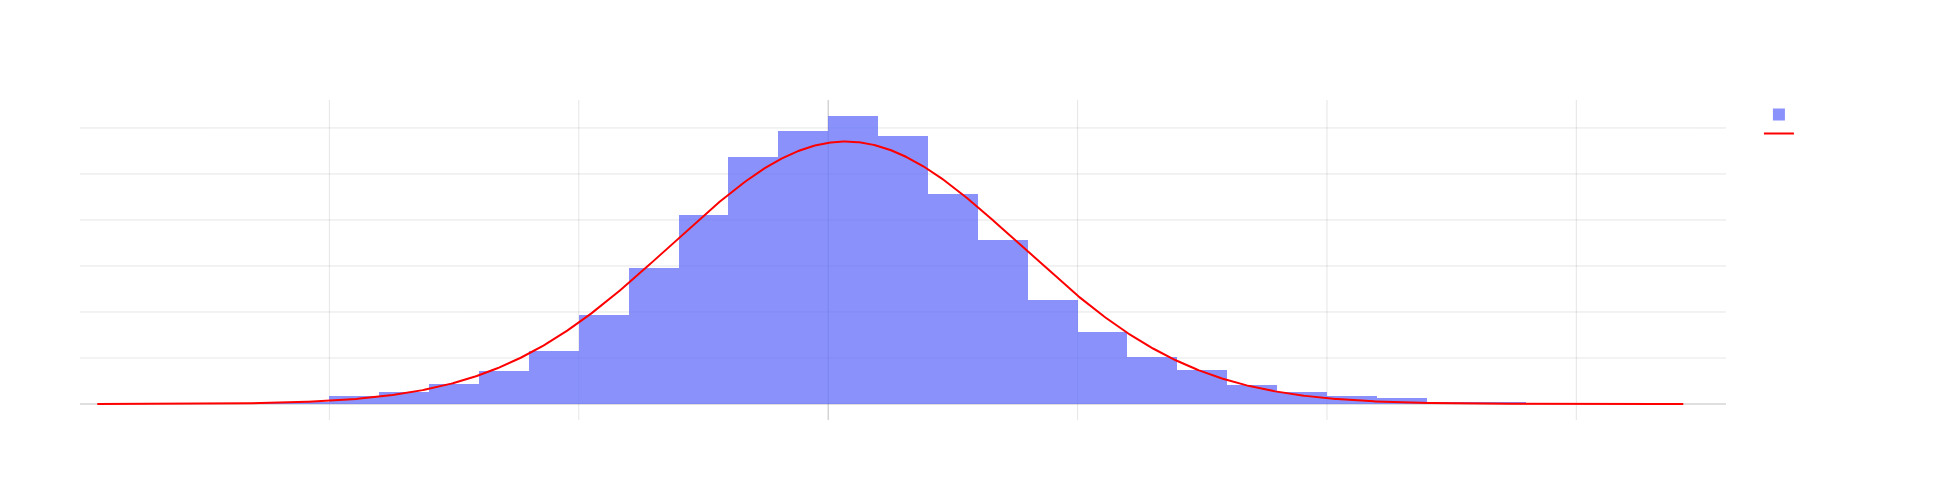


Simulated Returns Statistics:
Mean: 0.35%
Std Dev: 3.50%
Excess Kurtosis: 0.687


In [11]:
# Simulate returns using the Markov Chain and regime-specific distributions
n_steps = 10000
current_state = np.random.choice(states)  # Random initial state
simulated_returns = []

for _ in range(n_steps):
    # Get current regime parameters
    mu = regime_stats[current_state]['mean']
    sigma = regime_stats[current_state]['std']
    
    # Generate return from regime-specific distribution
    ret = np.random.normal(mu, sigma)
    simulated_returns.append(ret)
    
    # Transition to next state
    current_idx = states.index(current_state)
    current_state = states[np.random.choice(len(states), p=trans_matrix[current_idx])]

# Plot simulated returns vs normal distribution
simulated_returns = np.array(simulated_returns)
mu_sim = np.mean(simulated_returns)
sigma_sim = np.std(simulated_returns)

# Create histogram of simulated returns
fig = go.Figure()

# Add histogram of simulated returns
fig.add_trace(go.Histogram(
    x=simulated_returns*100,
    name='Simulated Returns',
    nbinsx=50,
    histnorm='probability density',
    opacity=0.75
))

# Add normal distribution curve
x = np.linspace(min(simulated_returns)*100, max(simulated_returns)*100, 1000)
y = 1/(sigma_sim*100 * np.sqrt(2 * np.pi)) * np.exp(-((x - mu_sim*100)**2) / (2 * (sigma_sim*100)**2))

fig.add_trace(go.Scatter(
    x=x,
    y=y,
    name='Normal Distribution',
    line=dict(color='red', width=2)
))

fig.update_layout(
    title='Simulated Returns Distribution vs Normal Distribution',
    xaxis_title='Return (%)',
    yaxis_title='Density',
    height=500,
    width=900,
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white'),
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)'
    )
)

fig.show()

print("\nSimulated Returns Statistics:")
print(f"Mean: {mu_sim*100:.2f}%")
print(f"Std Dev: {sigma_sim*100:.2f}%")
print(f"Excess Kurtosis: {((simulated_returns - np.mean(simulated_returns))**4).mean() / (np.std(simulated_returns)**4) - 3:.3f}")

###### ______________________________________________________________________________________________________________________________________

#####  🧾 General Recipe

If you wish to construct your own models in this capacity here is a general recipe that I will eventually include in my cookbook (by Chef Roman 👩🏻‍🍳)

*1.) Pick a relevant factor and state space (for example, volatility, trend, . . .)*

*2.) Define states and estimate transition probabilities from data*

*3.) Condition your data on these states and estimate parameters for desired random variable or empirical distributions*

*4.) Analyze the subsequent modelled or empirical distributions via simulation, for example*

---

#### 3.) 👥 Hidden Markov Models

##### What if the Desired Distribution Depends Also on Other Latent Factors?

# ![Markov Chains 1](mc3.png)

This is very likely the case!  But how do we model something we can't observe directly??

Rather, what is the best way to model these aggregate latent factors even if we can proxy for them??

**Latent Factor Examples:**
- Trend (Bullish, Bearish, Sideways)
- Volatility (Low, Med, High)

**Total States:** 9 (Low-Bear, Med-Bear, High-Bear, Low-Bull, Med-Bull, High-Bull, Low-Side, Med-Side, High-Side)

We could modify our Markov Chain example above, but what if there was an alternative approach?

###### ______________________________________________________________________________________________________________________________________

##### Hidden Markov Models

The Hidden Markov Model infers hidden regimes from observations - an incredibly powerful idea when we know theoretically there are latent (unobservable) driving factors!

# ![Markov Chains 1](hmm.png)

###### ______________________________________________________________________________________________________________________________________

##### Forward/Backward Algorithms

**Forward Algorithm:**

The Forward Algorithm calculates the probability of observing a sequence of observations given a model by recursively computing the joint probability of being in each state at each time step.


 $\alpha_t(i) = P(O_1,...,O_t,q_t=S_i|\lambda)$
 
 1. Initialization:
 $\alpha_1(i) = \pi_i b_i(O_1)$
 
 2. Recursion:
 $\alpha_{t+1}(j) = [\sum_{i=1}^N \alpha_t(i)a_{ij}]b_j(O_{t+1})$
 
 3. Termination:
 $P(O|\lambda) = \sum_{i=1}^N \alpha_T(i)$
 
 **Backward Algorithm:**

 The Backward Algorithm calculates the probability of observing a sequence of observations given a model by recursively computing the joint probability of being in each state at each time step.

 $\beta_t(i) = P(O_{t+1},...,O_T|q_t=S_i,\lambda)$
 
 1. Initialization:
 $\beta_T(i) = 1$
 
 2. Recursion:
 $\beta_t(i) = \sum_{j=1}^N a_{ij}b_j(O_{t+1})\beta_{t+1}(j)$
 
 Where:
 - $\lambda$ = model parameters
 - $O_t$ = observation at time t
 - $q_t$ = state at time t
 - $\pi_i$ = initial state probability
 - $a_{ij}$ = transition probability
 - $b_j(O_t)$ = emission probability

###### ______________________________________________________________________________________________________________________________________

##### Training Hidden Markov Models

Training, fitting, inference, blah-blah-blah

**Baum-Welch Algorithm:**
 
The Baum-Welch Algorithm is an EM (Expectation-Maximization) algorithm used to find the optimal parameters of an HMM by iteratively improving the model parameters to maximize the likelihood of the observations.
 
 1. E-Step: Calculate expected state occupancy and transition counts using Forward-Backward algorithms
 
 - $\gamma_t(i) = P(q_t=S_i|O,\lambda) = \frac{\alpha_t(i)\beta_t(i)}{P(O|\lambda)}$
 
 - $\xi_t(i,j) = P(q_t=S_i,q_{t+1}=S_j|O,\lambda) = \frac{\alpha_t(i)a_{ij}b_j(O_{t+1})\beta_{t+1}(j)}{P(O|\lambda)}$
 
 2. M-Step: Update model parameters
 
 - $\pi_i^{new} = \gamma_1(i)$
 
 - $a_{ij}^{new} = \frac{\sum_{t=1}^{T-1}\xi_t(i,j)}{\sum_{t=1}^{T-1}\gamma_t(i)}$
 
 - $\mu_i^{new} = \frac{\sum_{t=1}^T \gamma_t(i)O_t}{\sum_{t=1}^T \gamma_t(i)}$
 
 - $\sigma_i^{2,new} = \frac{\sum_{t=1}^T \gamma_t(i)(O_t-\mu_i^{new})^2}{\sum_{t=1}^T \gamma_t(i)}$
 
 Where:
 - $\gamma_t(i)$ = probability of being in state i at time t
 - $\xi_t(i,j)$ = probability of transitioning from state i to j at time t
 - $\mu_i, \sigma_i^2$ = parameters of emission probability distribution
 
 The algorithm iterates between E and M steps until convergence.

###### ______________________________________________________________________________________________________________________________________

 **Too Technical Didn't Read (TT;DR?)**
 
 1. Choose number of states N (hyperparameter)
 
 2. Forward-Backward Algorithm:
    - Forward pass (α) calculates P(observations up to t, state i at t)
    - Backward pass (β) calculates P(future observations given state i at t) 
    - Combine to get state probabilities γ and transition probabilities ξ

 3. Baum-Welch Algorithm (EM):
    - E-step: Use forward-backward to calculate expected state occupancies
    - M-step: Update model parameters (transitions, emissions) to maximize likelihood
    - Iterate until convergence

 4. Key Benefits:
    - Learns optimal state transitions and emissions
    - Uses both past and future information
    - Maximum likelihood estimation of parameters
    - Can capture regime changes in financial data

###### ______________________________________________________________________________________________________________________________________

##### Example: 3-State Hidden Markov Model


Transition Probabilities Matrix:
From/To      Latent State 1    Latent State 2    Latent State 3
Latent State 1  0.508         0.382          0.110
Latent State 2  0.377         0.623          0.000
Latent State 3  0.053         0.144          0.803

Latent State Statistics (Daily):

Latent State 1:
Mean Return: -1.66%
Std Dev: 1.48%
Number of Days: 132

Latent State 2:
Mean Return: 2.46%
Std Dev: 1.74%
Number of Days: 158

Latent State 3:
Mean Return: -0.76%
Std Dev: 6.46%
Number of Days: 61


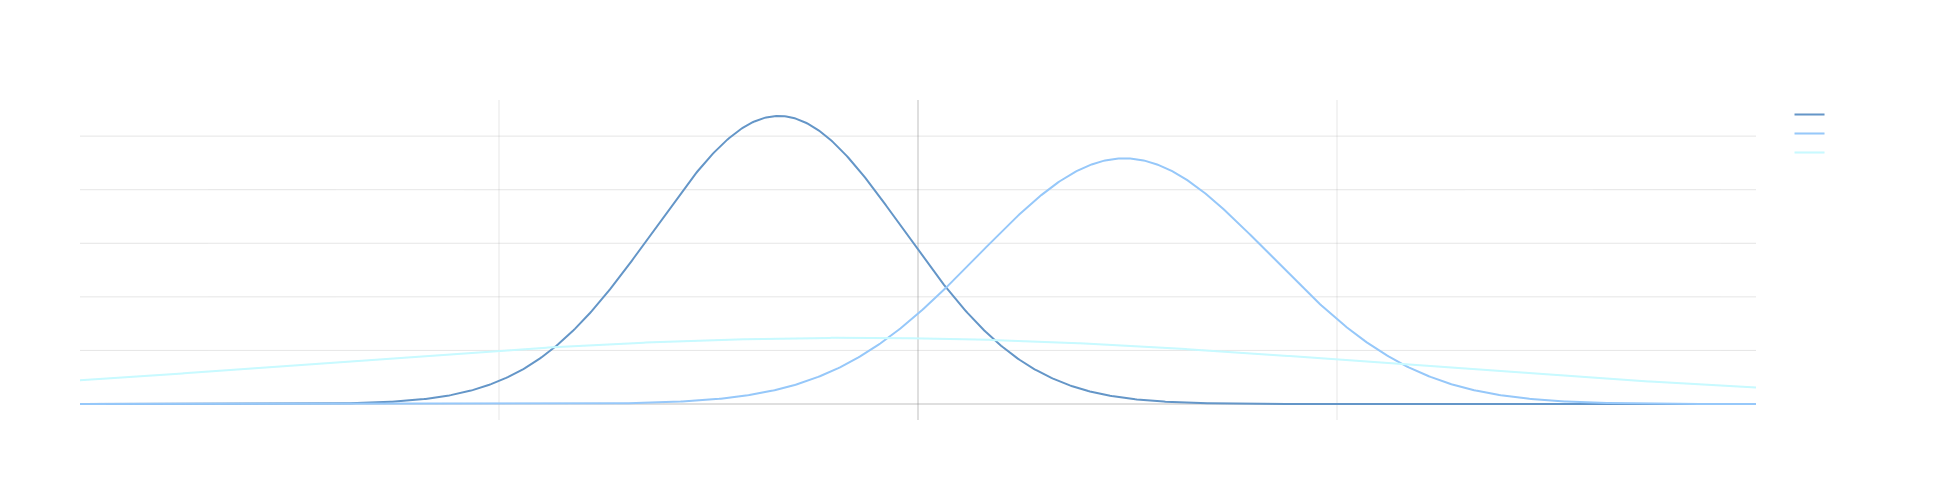

In [12]:
# Implement 3-state HMM from scratch

import numpy as np
from scipy.stats import norm
np.random.seed(42)

# Prepare the data
X = df['Returns'].values

# Initialize parameters
N = 3  # number of states
T = len(X)  # number of observations

# Random initialization
pi = np.ones(N) / N  # initial state probabilities
A = np.random.rand(N, N)  # transition matrix
A = A / A.sum(axis=1)[:, np.newaxis]

# Initialize emission parameters (mean and std for each state)
mu = np.array([-0.01, 0, 0.01])  # initial guesses for means
sigma = np.array([0.01, 0.02, 0.03])  # initial guesses for standard deviations

def forward_pass(X, pi, A, mu, sigma):
    alpha = np.zeros((T, N))
    # Initialize first timestep
    for j in range(N):
        alpha[0,j] = pi[j] * norm.pdf(X[0], mu[j], sigma[j])
    
    # Forward recursion
    for t in range(1, T):
        for j in range(N):
            alpha[t,j] = norm.pdf(X[t], mu[j], sigma[j]) * np.sum(alpha[t-1,:] * A[:,j])
            
    return alpha

def backward_pass(X, A, mu, sigma):
    beta = np.zeros((T, N))
    # Initialize last timestep
    beta[T-1,:] = 1
    
    # Backward recursion
    for t in range(T-2, -1, -1):
        for i in range(N):
            beta[t,i] = np.sum([A[i,j] * norm.pdf(X[t+1], mu[j], sigma[j]) * beta[t+1,j] for j in range(N)])
            
    return beta

# Run EM algorithm
max_iter = 100
prev_log_likelihood = -np.inf

for iteration in range(max_iter):
    # E-step
    alpha = forward_pass(X, pi, A, mu, sigma)
    beta = backward_pass(X, A, mu, sigma)
    
    # Calculate gamma (state probabilities)
    gamma = alpha * beta
    gamma = gamma / gamma.sum(axis=1)[:,np.newaxis]
    
    # Calculate xi (transition probabilities)
    xi = np.zeros((T-1, N, N))
    for t in range(T-1):
        for i in range(N):
            for j in range(N):
                xi[t,i,j] = alpha[t,i] * A[i,j] * norm.pdf(X[t+1], mu[j], sigma[j]) * beta[t+1,j]
        xi[t] = xi[t] / xi[t].sum()
    
    # M-step
    # Update initial probabilities
    pi = gamma[0]
    
    # Update transition matrix
    A = xi.sum(axis=0) / gamma[:-1].sum(axis=0)[:,np.newaxis]
    
    # Update emission parameters
    for j in range(N):
        mu[j] = np.sum(gamma[:,j] * X) / np.sum(gamma[:,j])
        sigma[j] = np.sqrt(np.sum(gamma[:,j] * (X - mu[j])**2) / np.sum(gamma[:,j]))
    
    # Check convergence
    log_likelihood = np.sum(np.log(np.sum(alpha * beta, axis=1)))
    if abs(log_likelihood - prev_log_likelihood) < 1e-6:
        break
    prev_log_likelihood = log_likelihood

# Get the hidden states
hidden_states = np.argmax(gamma, axis=1)

# Map numeric states to latent state labels
state_volatilities = np.array([np.std(X[hidden_states == i]) for i in range(N)])
state_order = np.argsort(state_volatilities)
regime_map = {
    state_order[0]: 'Latent State 1',
    state_order[1]: 'Latent State 2',
    state_order[2]: 'Latent State 3'
}
regimes = [regime_map[state] for state in hidden_states]

# Calculate regime statistics
regime_stats = {}
for regime in ['Latent State 1', 'Latent State 2', 'Latent State 3']:
    mask = [r == regime for r in regimes]
    returns = df.loc[mask, 'Returns']
    
    regime_stats[regime] = {
        'mean': returns.mean(),
        'std': returns.std(),
        'count': len(returns)
    }

# Print results
print("\nTransition Probabilities Matrix:")
print("From/To      Latent State 1    Latent State 2    Latent State 3")
states = ['Latent State 1', 'Latent State 2', 'Latent State 3']
for i, state in enumerate(states):
    print(f"{state:15} {A[i,0]:.3f}         {A[i,1]:.3f}          {A[i,2]:.3f}")

print("\nLatent State Statistics (Daily):")
for regime, stats in regime_stats.items():
    print(f"\n{regime}:")
    print(f"Mean Return: {stats['mean']*100:.2f}%")
    print(f"Std Dev: {stats['std']*100:.2f}%")
    print(f"Number of Days: {stats['count']}")

# Plot regime distributions
x = np.linspace(-0.1, 0.1, 1000)
fig = go.Figure()

for regime in ['Latent State 1', 'Latent State 2', 'Latent State 3']:
    mu_r = regime_stats[regime]['mean']
    sigma_r = regime_stats[regime]['std']
    y = 1/(sigma_r * np.sqrt(2 * np.pi)) * np.exp(-(x - mu_r)**2 / (2 * sigma_r**2))
    
    fig.add_trace(
        go.Scatter(
            x=x*100,
            y=y,
            name=regime,
            line=dict(color=f'rgb({50 + int(regime[-1])*50}, {100 + int(regime[-1])*50}, {150 + int(regime[-1])*50})')
        )
    )

fig.update_layout(
    title='Return Distributions by Latent State (HMM)',
    xaxis_title='Daily Return (%)',
    yaxis_title='Density',
    height=500,
    width=900,
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white'),
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)'
    )
)

fig.show()


##### Critical Considerations

- We CAN overfit this model

- We lose interpretability any time there is compression (latent factor compression here)

- Simpler models may explain similar variability but maintain interpretability

We would have to assess the robustness of these models out of sample to determine if the lack of explainability (or more difficulty teasing out explainability)

was worth the performance improvement (business won't be happy about this!)

---

#### 4.) 💭 Closing Thoughts and Future Topics

**TL;DW Executive Summary**
- Estimating parameters for random variables is not a trivial task due to the time variant nature of the space, these parameters and population distributions change over time
- Latent parameters are even more difficult to estimate as we have to first proxy for the quantity (several layers of measurement error) along with the traditional problems of modeling uncertainty as randomness in practice
- Economically, these latent variables tend to influence other distributions and variables of interest (i.e. stock returns) and must somehow be included in our models
- In any case, naive assumptions are violated in practice making models *very* wrong when trying to make optimal decisions in the face of uncertainty where some assumptions are more incorrect than others leading our model informed decision making to be either effective (weak assumptions violated) or ineffective (strong assumptions violated)
- Markov Chains help alleviate some violently incorrect assumptions by allow us to explictly define different states or regimes that persist in local conditional dependence (Markov property) and we can use these states to model subsequent returns
- When there is more than one latent factor, or the latent factor itself is difficult to proxy for we may consider Hidden Markov Models which aim to construct the latent states by using the data that was generated by the process (and all the accompanying assumptions encourage MLE estimates which is very nice :))
- Regardless, if you choose to implement any of these models you must be careful as you can easily still: overfit, lose interpretability and have no idea why you are observing a value at any given time, so on and so forth

**Future Topics**

Technical Videos and Other Discussions

- Advanced Markov Chains (Absorbing States, Communication Classes, Ergodicity and Stationary Distributions, . . .)

- Topics in Stochastic Calculus

- Stochastic Proccesses: Brownian Motion, Arithmetic (additive) Geometric (multiplicative) Brownian Motion

- Deriving the Black-Scholes Equation: PDE, Analytical/Numerical Solutions

[Ideas for Interactive Brokers Apps and Tutorials](https://www.interactivebrokers.com/mkt/?src=quantguildY&url=%2Fen%2Fwhyib%2Foverview.php)

- How to Build an Earnings Event Options Trading Dashboard

- Live Kalman Filter Model with Regime Dynamics (MCs/HMMs) 

- Automated Delta-Neutral Trading System
    - Kalman Filter to Discern Mean Return for Reversion
    - Volatility Regime via HMM/MCs to Dictate Re-Hedging Interval
    - Thoughts on this?

---

####  $\text{Copyright © 2025 Quant Guild} \quad \quad \quad \quad \text{Author: Roman Paolucci}$